In [55]:
import numpy as np
import pylab as pl
import ot
import scipy
import scipy.stats

In [56]:
N = 3
d = 2
n_i = np.random.randint(low=10, high=20)  # nb samples

measures_locations = []
measures_weights = []

mu_i = np.random.normal(0., 4., (d,))  # Gaussian mean
for i in range(N):
    
    A_i = np.random.rand(d, d)
    cov_i = np.dot(A_i, A_i.transpose())  # Gaussian covariance matrix

    x_i = ot.datasets.make_2D_samples_gauss(n_i, mu_i, cov_i)  # Dirac locations
    b_i = np.random.rand(1, n_i) #(np.array([1]*n_i))
    b_i = b_i / np.sum(b_i)
    
#     if N==2:
#         s = np.random.normal(3, 4, 20)
#         x_i = [list(a) for a in zip(np.arange(0,1,1/20).tolist(), s.tolist())]
    measures_locations.append(x_i)
    measures_weights.append(b_i)

In [57]:
n_i

17

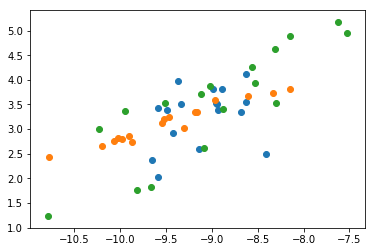

In [58]:
pl.figure(1)
for (x_i, b_i) in zip(measures_locations, measures_weights):
    color = np.random.randint(low=1, high=10 * N)
    pl.scatter(x_i[:, 0], x_i[:, 1], label='input measure')
pl.show()

In [59]:
len( X_init )

14

In [60]:
k = n_i  # number of Diracs of the barycenter
X_init = np.random.normal(0., 4., (k, 2))  # initial Dirac locations
b = np.random.rand(1, k) #(np.array([1]*n_i))
b = b / np.sum(b)

In [61]:
b

array([[0.08381432, 0.04772551, 0.07230138, 0.04794143, 0.07997158,
        0.06858311, 0.07487934, 0.05865626, 0.02449484, 0.01817576,
        0.08039473, 0.07708003, 0.06550587, 0.03506974, 0.06602672,
        0.03519736, 0.06418203]])

In [62]:
X_joint = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, b)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [19]:
X_12 = ot.lp.free_support_barycenter(measures_locations[:2], measures_weights[:2], X_init, weights=np.array([1/2,1/2]))

measures_12_3 = [X_12, measures_locations[2]]
weights = [np.ones(len(X_12))/len(X_12), np.ones(len(measures_locations[2]))/len(measures_locations[2])]
smallest = float("inf")
smallestBeta = -1
dots = []
for i in np.arange(0,1,0.001):
    X_3 = ot.lp.free_support_barycenter(measures_12_3,
                                weights,
                                X_init,
                                weights=np.array([i, 1-i])
                                                                          ,stopThr=10e-8,numItermax=1000)
    M = ot.dist(X_3, X_joint)
    a,b = np.ones((len(X_3),)) / len(X_3), np.ones((len(X_joint),))/len(X_joint)
    G0 = ot.emd(a,b,M)
    dist = np.sum(np.multiply(M,G0))
    if (dist < smallest):
        smallest = dist
        smallestBeta = i
    dots.append( dist )
print(smallestBeta)

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

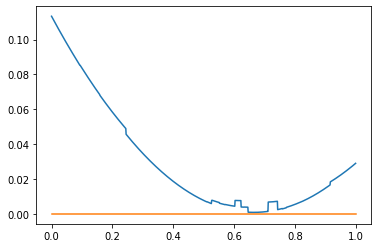

In [53]:
pl.figure(1)
pl.plot(np.arange(0,1,0.001), dots)
pl.plot([0,1],[0,0])

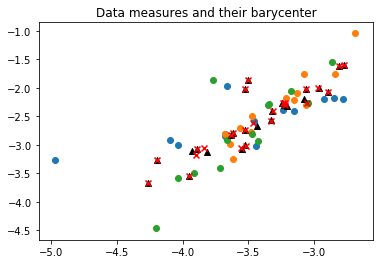

In [54]:
i=smallestBeta
X_3 = ot.lp.free_support_barycenter(measures_12_3,
                                weights,
                                X_init,
                                weights=np.array([i, 1-i])
                                    ,stopThr=10e-8,numItermax=1000)
pl.figure(1)
for (x_i, b_i) in zip(measures_locations, measures_weights):
    color = np.random.randint(low=1, high=10 * N)
    pl.scatter(x_i[:, 0], x_i[:, 1], label='input measure')
pl.scatter(X_joint[:, 0], X_joint[:, 1], c='black', marker='^', label='2-Wasserstein barycenter')
pl.scatter(X_3[:, 0], X_3[:, 1], c='red', marker='x', label='2-Wasserstein barycenter for 1,2')

pl.title('Data measures and their barycenter')
pl.show()

In [55]:
print(X_3 - X_joint)


[[ 1.10983124e-01  7.37117819e-02]
 [ 2.30535824e-03  1.17814911e-02]
 [ 3.14297403e-01  1.15472500e-01]
 [-3.15019928e-01 -1.22047824e-01]
 [ 6.19341492e-04 -1.22939101e-03]
 [-2.03608622e-01 -2.33325435e-01]
 [-4.49777702e-04 -1.14921908e-04]
 [-3.00329217e-03 -4.46003816e-03]
 [-2.95721474e-04  1.42126106e-04]
 [-1.09295075e-01  1.88421818e-01]
 [ 2.86385084e-02  4.66639832e-02]
 [-1.52096202e-02  1.45629529e-02]
 [-8.42414018e-04  5.22881050e-04]
 [ 5.65443349e-03  2.66855746e-02]
 [ 1.91472596e-02  1.61100762e-01]
 [-3.43277564e-04  1.93694456e-04]
 [ 2.26170753e-02 -7.01751519e-02]
 [ 3.94259149e-04 -7.69500917e-04]
 [-1.48148191e-01 -2.20233638e-01]
 [-1.06940839e-03 -4.40964125e-06]
 [-1.08010957e-04 -5.34909557e-04]
 [-7.63008179e-04 -3.13918213e-04]
 [-6.23673042e-04 -7.56052674e-04]
 [ 2.60331837e-01  6.76104512e-02]
 [ 2.51189638e-02 -7.26236220e-02]]


In [65]:
def apply_map_to_mtx(T, M, N):
    """
    T moves from M to N
    """
    A = M - N
    ret = []
    for i in range(len(T)):
        cur = T[0][0]*M[0]
        for j in range(1, len(T[0])):
            cur += T[i][j] * (A[j])
        ret.append(cur)
    return ret

T = np.array([[1,0,0], [0,0,1], [0,1,0]])
M = np.array([[0,0,0], [3,0,0], [0,0,3]])
N = np.array([[0,0,0], [0,0,3], [3,0,0]])
bb = apply_map_to_mtx(T,M,N) + M

print(bb)

[[0 0 0]
 [0 0 3]
 [3 0 0]]


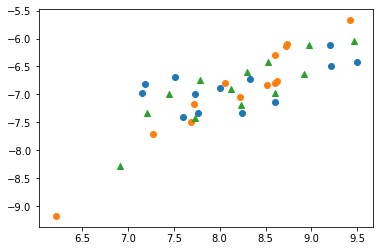

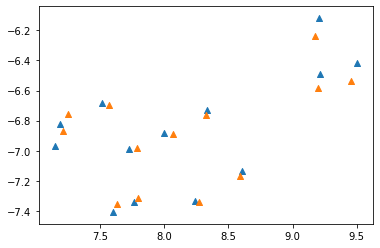

In [73]:
import scipy as sp
x0 = measures_locations[0]
x1 = measures_locations[1]


p0 = np.array([1/len(x0)] * len(x0))
p1 = np.array([1/len(x1)] * len(x1))

measures_locations = [x0, x1]
measures_weights = [p0, p1]



k = len(x0)  # number of Diracs of the barycenter
d = 2
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations
X_joint = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, weights=np.array([1/2,1/2]))

pl.figure(1)
for (x_i, b_i) in zip(measures_locations, measures_weights ):
    color = np.random.randint(low=1, high=10)
    pl.scatter(x_i[:, 0], x_i[:, 1], label='input measure')
pl.scatter(X_joint[:, 0], X_joint[:, 1], marker='^')
pl.show()

dist = sp.spatial.distance.cdist(x0, x1)
a = ot.bregman.sinkhorn(p0, p1, dist, 0.1) # map from de to bar_de_fr



np.exp(np.dot(np.log(a), weights.T))

pl.figure(1)

pl.scatter(x0[:, 0], x0[:, 1], marker='^')
pl.scatter(ccc[:, 0], ccc[:, 1], marker='^')

pl.show()


array([[5.01450233e-01, 9.35010742e-06, 5.39143706e-12, 1.30593199e-13,
        1.04049094e-02, 3.99063656e-09, 5.53987825e-14, 7.38158080e-09,
        2.16583621e-06, 1.93142188e-05, 1.39319140e-02, 8.10957122e-13,
        1.26436403e-02],
       [8.44662877e-03, 5.08245308e-01, 3.26437954e-07, 7.47486113e-09,
        1.65416579e-03, 2.07770225e-04, 2.62366799e-09, 2.78010360e-04,
        8.89359711e-03, 9.59684600e-03, 7.85964204e-07, 4.13678040e-08,
        1.13804794e-03],
       [3.59873233e-03, 3.64356678e-03, 5.00138254e-01, 2.83960211e-06,
        7.22922712e-04, 1.44525252e-02, 8.74732195e-07, 6.65928493e-03,
        5.03157045e-03, 3.69437282e-03, 2.77316342e-07, 1.18093848e-05,
        5.04507969e-04],
       [1.77948806e-03, 4.60915955e-04, 5.92678217e-03, 5.10014696e-01,
        4.81496146e-04, 2.74827002e-03, 1.34123529e-02, 1.10733793e-03,
        6.16275248e-04, 4.89576172e-04, 1.75638025e-07, 1.06425697e-03,
        3.59915419e-04],
       [3.01520115e-05, 7.72495393e-